In [3]:
try:
  import numpy as np # using it for the detecting dimintions!
  import cv2 # using it to detect face, eyes etc.!
  from matplotlib import pyplot as plt # using it to display the images!
  %matplotlib inline

except Exception as e:
  print('Packages are Missing! \n {}'.format(e))

In [5]:
img = cv2.imread('./data/test/test.jpg')
img.shape

(555, 700, 3)

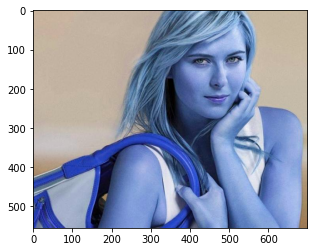

In [6]:
plt.imshow(img)